Change directory back to the root dir of this project (where the "dj_local_conf.json" file is located)

In [1]:
cd ../.. 

/nfs/nhome/live/thinh/code/ProjectAeon/aeon


In [2]:
import warnings

warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", category=ResourceWarning)
warnings.simplefilter("ignore", category=FutureWarning)

In [3]:
import datajoint as dj

dj.logger.setLevel("ERROR")

dj.config["custom"][
    "database.prefix"
] = "aeon_test_"  # data are ingested into schemas prefixed with "aeon_test_" for testing

# Pipeline architecture

In [4]:
# If you have the `datajoint_pipeline` branch of the `aeon_mecha` pip installed
# you can import the modules directly - if not, comment out this cell and use the cell below

from aeon.dj_pipeline import acquisition, streams

In [5]:
# If you don't have the `datajoint_pipeline` branch of the `aeon_mecha` pip installed
# then instead of importing the modules, you can use DataJoint's VirtualModule to access the pipeline
# uncomment and run the codeblock below

# acquisition = dj.VirtualModule('acquisition', 'aeon_test_acquisition')
# streams = dj.VirtualModule('streams', 'aeon_test_streams')

In [6]:
# Note that we're on the "aeon_test_" database prefix
print(acquisition.schema)

Schema `aeon_test_acquisition`



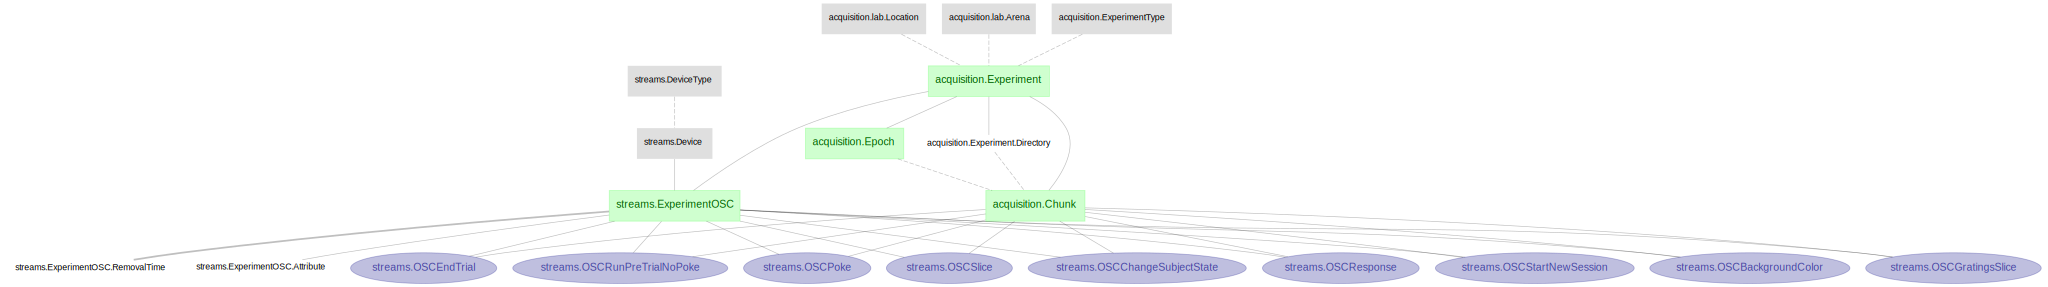

In [7]:
# Diagram for pipeline architecture surrounding the "ExperimentOSC" table
dj.Diagram(streams.ExperimentOSC) + 1 - 2

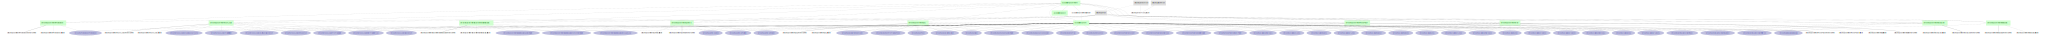

In [8]:
# Diagram for pipeline architecture related to all "data streams"
dj.Diagram(streams) - 1

# Explore the data

In [9]:
acquisition.Experiment()

experiment_name e.g exp0-r0,experiment_start_time datetime of the start of this experiment,experiment_description,arena_name unique name of the arena (e.g. circular_2m),lab Abbreviated lab name,location,experiment_type
oct1.0-r0,2022-02-22 09:00:00,octagon 1.0,octagon-1m,SWC,464,social


In [10]:
exp_key = {"experiment_name": "oct1.0-r0"}

In [11]:
acquisition.Chunk & exp_key

experiment_name e.g exp0-r0,chunk_start datetime of the start of a given acquisition chunk,chunk_end datetime of the end of a given acquisition chunk,directory_type,epoch_start
oct1.0-r0,1904-01-01 22:00:00,1904-01-01 23:00:00,raw,2022-08-22 11:47:16
oct1.0-r0,1904-01-02 00:00:00,1904-01-02 01:00:00,raw,2022-08-22 14:09:36
oct1.0-r0,1904-01-02 23:00:00,1904-01-03 00:00:00,raw,2022-08-23 12:41:49
oct1.0-r0,1904-01-03 22:00:00,1904-01-03 23:00:00,raw,2022-08-24 11:40:58
oct1.0-r0,1904-01-04 23:00:00,1904-01-05 00:00:00,raw,2022-08-25 13:01:30
oct1.0-r0,1904-01-05 00:00:00,1904-01-05 01:00:00,raw,2022-08-25 13:24:11
oct1.0-r0,1904-01-06 00:00:00,1904-01-06 01:00:00,raw,2022-08-26 14:05:07
oct1.0-r0,1904-01-06 01:00:00,1904-01-06 02:00:00,raw,2022-08-26 14:29:13
oct1.0-r0,1904-01-06 23:00:00,1904-01-07 00:00:00,raw,2022-08-27 13:31:50
oct1.0-r0,1904-01-07 00:00:00,1904-01-07 01:00:00,raw,2022-08-27 13:31:50


## Records on the devices in use for "oct1.0-r0"

In [12]:
streams.ExperimentCamera()

experiment_name e.g exp0-r0,device_serial_number,camera_install_time time of the camera placed and started operation at this position,camera_name
oct1.0-r0,oct01_1,2022-07-04 12:19:42,CameraTop
oct1.0-r0,oct01_2,2022-07-04 12:19:42,CameraColorTop


In [13]:
streams.ExperimentWall()

experiment_name e.g exp0-r0,device_serial_number,wall_install_time time of the wall placed and started operation at this position,wall_name
oct1.0-r0,oct01_10,2022-07-04 12:19:42,Wall4
oct1.0-r0,oct01_11,2022-07-04 12:19:42,Wall5
oct1.0-r0,oct01_12,2022-07-04 12:19:42,Wall6
oct1.0-r0,oct01_13,2022-07-04 12:19:42,Wall7
oct1.0-r0,oct01_14,2022-07-04 12:19:42,Wall8
oct1.0-r0,oct01_7,2022-07-04 12:19:42,Wall1
oct1.0-r0,oct01_8,2022-07-04 12:19:42,Wall2
oct1.0-r0,oct01_9,2022-07-04 12:19:42,Wall3


In [14]:
streams.ExperimentOSC()

experiment_name e.g exp0-r0,device_serial_number,o_s_c_install_time time of the o_s_c placed and started operation at this position,o_s_c_name
oct1.0-r0,oct01_5,2022-07-04 12:19:42,OSC


## Query/fetch streams' data

### OSCPoke

In [15]:
streams.OSCPoke()

experiment_name e.g exp0-r0,device_serial_number,o_s_c_install_time time of the o_s_c placed and started operation at this position,chunk_start datetime of the start of a given acquisition chunk,sample_count number of data points acquired from this stream for a given chunk,timestamps (datetime) timestamps of Poke data,typetag,wall_id,poke_id,reward,reward_interval,delay,led_delay
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-07-04 13:09:51,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-07-05 09:00:00,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-07-05 22:00:00,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-07-06 10:00:00,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-07-06 13:36:28,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-07-07 12:00:00,152,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-07-07 13:00:00,84,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-07-07 14:00:00,200,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-07-07 15:00:00,252,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-07-07 16:00:00,22,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [16]:
streams.OSCPoke & 'chunk_start BETWEEN "2022-08-01" AND "2022-08-03"'

experiment_name e.g exp0-r0,device_serial_number,o_s_c_install_time time of the o_s_c placed and started operation at this position,chunk_start datetime of the start of a given acquisition chunk,sample_count number of data points acquired from this stream for a given chunk,timestamps (datetime) timestamps of Poke data,typetag,wall_id,poke_id,reward,reward_interval,delay,led_delay
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-08-01 08:00:00,2624,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-08-01 09:00:00,2640,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-08-01 09:46:59,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-08-02 07:00:00,3104,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-08-02 08:00:00,272,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
oct1.0-r0,oct01_5,2022-07-04 12:19:42,2022-08-02 08:33:16,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [17]:
df_oscpoke = (streams.OSCPoke & 'chunk_start BETWEEN "2022-08-01" AND "2022-08-03"').fetch(format="frame")
df_oscpoke

sample_count  \
experiment_name device_serial_number o_s_c_install_time  chunk_start                         
oct1.0-r0       oct01_5              2022-07-04 12:19:42 2022-08-01 08:00:00          2624   
                                                         2022-08-01 09:00:00          2640   
                                                         2022-08-01 09:46:59             0   
                                                         2022-08-02 07:00:00          3104   
                                                         2022-08-02 08:00:00           272   
                                                         2022-08-02 08:33:16             0   

                                                                                                                     timestamps  \
experiment_name device_serial_number o_s_c_install_time  chunk_start                                                              
oct1.0-r0       oct01_5              2022-07-04 12:19:42 2022-08-01 08:00:00  [2022-08-01T08:03:48.654019833, 2022-08-01T08:...   
                                                         2022-08-01 09:00:00  [2022-08-01T09:00:01.149020195, 2022-08-01T09:...   
                                                         2022-08-01 09:46:59                                                 []   
                                                         2022-08-02 07:00:00  [2022-08-02T07:02:03.012030125, 2022-08-02T07:...   
                                                         2022-08-02 08:00:00  [2022-08-02T08:00:43.782020092, 2022-08-02T08:...   
                                                         2022-08-02 08:33:16                                                 []   

                                                                                                                        typetag  \
experiment_name device_serial_number o_s_c_install_time  chunk_start                                                              
oct1.0-r0       oct01_5              2022-07-04 12:19:42 2022-08-01 08:00:00  [iiifff, iiifff, iiifff, iiifff, iiifff, iiiff...   
                                                         2022-08-01 09:00:00  [iiifff, iiifff, iiifff, iiifff, iiifff, iiiff...   
                                                         2022-08-01 09:46:59                                                 []   
                                                         2022-08-02 07:00:00  [iiifff, iiifff, iiifff, iiifff, iiifff, iiiff...   
                                                         2022-08-02 08:00:00  [iiifff, iiifff, iiifff, iiifff, iiifff, iiiff...   
                                                         2022-08-02 08:33:16                                                 []   

                                                                                                                        wall_id  \
experiment_name device_serial_number o_s_c_install_time  chunk_start                                                              
oct1.0-r0       oct01_5              2022-07-04 12:19:42 2022-08-01 08:00:00  [1, 1, 5, 5, 2, 2, 3, 3, 4, 4, 6, 6, 7, 7, 8, ...   
                                                         2022-08-01 09:00:00  [1, 1, 5, 5, 2, 2, 3, 3, 4, 4, 6, 6, 7, 7, 8, ...   
                                                         2022-08-01 09:46:59                                                 []   
                                                         2022-08-02 07:00:00  [3, 3, 4, 4, 1, 1, 2, 2, 5, 5, 6, 6, 7, 7, 8, ...   
                                                         2022-08-02 08:00:00  [2, 2, 3, 3, 1, 1, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...   
                                                         2022-08-02 08:33:16                                                 []   

                                                                                                                        poke_id  \
experiment_name device_serial_number o_s_c_inst

In [18]:
df_oscpoke.explode(
    ["timestamps", "typetag", "wall_id", "poke_id", "reward", "reward_interval", "delay", "led_delay"]
)

sample_count  \
experiment_name device_serial_number o_s_c_install_time  chunk_start                         
oct1.0-r0       oct01_5              2022-07-04 12:19:42 2022-08-01 08:00:00          2624   
                                                         2022-08-01 08:00:00          2624   
                                                         2022-08-01 08:00:00          2624   
                                                         2022-08-01 08:00:00          2624   
                                                         2022-08-01 08:00:00          2624   
...                                                                                    ...   
                                                         2022-08-02 08:00:00           272   
                                                         2022-08-02 08:00:00           272   
                                                         2022-08-02 08:00:00           272   
                                                         2022-08-02 08:00:00           272   
                                                         2022-08-02 08:33:16             0   

                                                                                                timestamps  \
experiment_name device_serial_number o_s_c_install_time  chunk_start                                         
oct1.0-r0       oct01_5              2022-07-04 12:19:42 2022-08-01 08:00:00 2022-08-01 08:03:48.654019833   
                                                         2022-08-01 08:00:00 2022-08-01 08:03:48.656030178   
                                                         2022-08-01 08:00:00 2022-08-01 08:03:48.828030109   
                                                         2022-08-01 08:00:00 2022-08-01 08:03:48.860030174   
                                                         2022-08-01 08:00:00 2022-08-01 08:03:48.860030174   
...                                                                                                    ...   
                                                         2022-08-02 08:00:00 2022-08-02 08:09:47.363009930   
                                                         2022-08-02 08:00:00 2022-08-02 08:09:47.363009930   
                                                         2022-08-02 08:00:00 2022-08-02 08:09:47.363009930   
                                                         2022-08-02 08:00:00 2022-08-02 08:09:47.363009930   
                                                         2022-08-02 08:33:16                           NaT   

                                                                             typetag  \
experiment_name device_serial_number o_s_c_install_time  chunk_start                   
oct1.0-r0       oct01_5              2022-07-04 12:19:42 2022-08-01 08:00:00  iiifff   
                                                         2022-08-01 08:00:00  iiifff   
                                                         2022-08-01 08:00:00  iiifff   
                                                         2022-08-01 08:00:00  iiifff   
                                                         2022-08-01 08:00:00  iiifff   
...                                                                              ...   
                                                         2022-08-02 08:00:00  iiifff   
                                                         2022-08-02 08:00:00  iiifff   
                                                         2022-08-02 08:00:00  iiifff   
                                                         2022-08-02 08:00:00  iiifff   
                                                         2022-08-02 08:33:16     NaN   

                                                                             wall_id  \
experiment_name device_serial_number o_s_c_install_time  chunk_start                   
oct1.0-r0       oct01_5              2022-07-04 12:19:42 2022-08-01 08:00:00       1   
               

### Wall BreamBreak0

In [19]:
streams.WallBeamBreak0()

experiment_name e.g exp0-r0,device_serial_number,wall_install_time time of the wall placed and started operation at this position,chunk_start datetime of the start of a given acquisition chunk,sample_count number of data points acquired from this stream for a given chunk,timestamps (datetime) timestamps of BeamBreak0 data,state
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-04 13:09:51,0,=BLOB=,=BLOB=
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-05 09:00:00,0,=BLOB=,=BLOB=
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-05 22:00:00,0,=BLOB=,=BLOB=
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-06 10:00:00,0,=BLOB=,=BLOB=
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-06 13:36:28,0,=BLOB=,=BLOB=
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-07 12:00:00,51,=BLOB=,=BLOB=
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-07 13:00:00,4,=BLOB=,=BLOB=
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-07 14:00:00,22,=BLOB=,=BLOB=
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-07 15:00:00,71,=BLOB=,=BLOB=
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-07 16:00:00,4,=BLOB=,=BLOB=


In [20]:
streams.WallBeamBreak0 * streams.ExperimentWall & 'wall_name = "Wall4"'

experiment_name e.g exp0-r0,device_serial_number,wall_install_time time of the wall placed and started operation at this position,chunk_start datetime of the start of a given acquisition chunk,sample_count number of data points acquired from this stream for a given chunk,timestamps (datetime) timestamps of BeamBreak0 data,state,wall_name
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-04 13:09:51,0,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-05 09:00:00,0,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-05 22:00:00,0,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-06 10:00:00,0,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-06 13:36:28,0,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-07 12:00:00,51,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-07 13:00:00,4,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-07 14:00:00,22,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-07 15:00:00,71,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-07-07 16:00:00,4,=BLOB=,=BLOB=,Wall4


In [21]:
(
    streams.WallBeamBreak0 * streams.ExperimentWall
    & 'wall_name = "Wall4"'
    & 'chunk_start BETWEEN "2022-08-01" AND "2022-08-03"'
)

experiment_name e.g exp0-r0,device_serial_number,wall_install_time time of the wall placed and started operation at this position,chunk_start datetime of the start of a given acquisition chunk,sample_count number of data points acquired from this stream for a given chunk,timestamps (datetime) timestamps of BeamBreak0 data,state,wall_name
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-08-01 08:00:00,44,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-08-01 09:00:00,60,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-08-01 09:46:59,0,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-08-02 07:00:00,18,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-08-02 08:00:00,0,=BLOB=,=BLOB=,Wall4
oct1.0-r0,oct01_10,2022-07-04 12:19:42,2022-08-02 08:33:16,0,=BLOB=,=BLOB=,Wall4


In [22]:
df_wall4_beambreak0 = (
    streams.WallBeamBreak0 * streams.ExperimentWall
    & 'wall_name = "Wall4"'
    & 'chunk_start BETWEEN "2022-08-01" AND "2022-08-03"'
).fetch(format="frame")
df_wall4_beambreak0

sample_count  \
experiment_name device_serial_number wall_install_time   chunk_start                         
oct1.0-r0       oct01_10             2022-07-04 12:19:42 2022-08-01 08:00:00            44   
                                                         2022-08-01 09:00:00            60   
                                                         2022-08-01 09:46:59             0   
                                                         2022-08-02 07:00:00            18   
                                                         2022-08-02 08:00:00             0   
                                                         2022-08-02 08:33:16             0   

                                                                                                                     timestamps  \
experiment_name device_serial_number wall_install_time   chunk_start                                                              
oct1.0-r0       oct01_10             2022-07-04 12:19:42 2022-08-01 08:00:00  [2022-08-01T08:05:37.040832043, 2022-08-01T08:...   
                                                         2022-08-01 09:00:00  [2022-08-01T09:01:05.836512089, 2022-08-01T09:...   
                                                         2022-08-01 09:46:59                                                 []   
                                                         2022-08-02 07:00:00  [2022-08-02T07:03:49.623007774, 2022-08-02T07:...   
                                                         2022-08-02 08:00:00                                                 []   
                                                         2022-08-02 08:33:16                                                 []   

                                                                                                                          state  \
experiment_name device_serial_number wall_install_time   chunk_start                                                              
oct1.0-r0       oct01_10             2022-07-04 12:19:42 2022-08-01 08:00:00  [True, False, True, False, True, False, True, ...   
                                                         2022-08-01 09:00:00  [True, False, True, False, True, False, True, ...   
                                                         2022-08-01 09:46:59                                                 []   
                                                         2022-08-02 07:00:00  [False, False, True, False, True, False, True,...   
                                                         2022-08-02 08:00:00                                                 []   
                                                         2022-08-02 08:33:16                                                 []   

                                                                             wall_name  
experiment_name device_serial_number wall_install_time   chunk_start                    
oct1.0-r0       oct01_10             2022-07-04 12:19:42 2022-08-01 08:00:00     Wall4  
                                                         2022-08-01 09:00:00     Wall4  
                                                         2022-08-01 09:46:59     Wall4  
                                                         2022-08-02 07:00:00     Wall4  
                                                         2022-08-02 08:00:00     Wall4  
                                                         2022-08-02 08:33:16     Wall4

In [23]:
df_wall4_beambreak0.explode(["timestamps", "state"])

sample_count  \
experiment_name device_serial_number wall_install_time   chunk_start                         
oct1.0-r0       oct01_10             2022-07-04 12:19:42 2022-08-01 08:00:00            44   
                                                         2022-08-01 08:00:00            44   
                                                         2022-08-01 08:00:00            44   
                                                         2022-08-01 08:00:00            44   
                                                         2022-08-01 08:00:00            44   
...                                                                                    ...   
                                                         2022-08-02 07:00:00            18   
                                                         2022-08-02 07:00:00            18   
                                                         2022-08-02 07:00:00            18   
                                                         2022-08-02 08:00:00             0   
                                                         2022-08-02 08:33:16             0   

                                                                                                timestamps  \
experiment_name device_serial_number wall_install_time   chunk_start                                         
oct1.0-r0       oct01_10             2022-07-04 12:19:42 2022-08-01 08:00:00 2022-08-01 08:05:37.040832043   
                                                         2022-08-01 08:00:00 2022-08-01 08:05:37.196159840   
                                                         2022-08-01 08:00:00 2022-08-01 08:05:37.473504066   
                                                         2022-08-01 08:00:00 2022-08-01 08:05:38.539423943   
                                                         2022-08-01 08:00:00 2022-08-01 08:07:39.035744190   
...                                                                                                    ...   
                                                         2022-08-02 07:00:00 2022-08-02 07:37:16.132671832   
                                                         2022-08-02 07:00:00 2022-08-02 07:40:44.873568058   
                                                         2022-08-02 07:00:00 2022-08-02 07:40:45.047200203   
                                                         2022-08-02 08:00:00                           NaT   
                                                         2022-08-02 08:33:16                           NaT   

                                                                              state  \
experiment_name device_serial_number wall_install_time   chunk_start                  
oct1.0-r0       oct01_10             2022-07-04 12:19:42 2022-08-01 08:00:00   True   
                                                         2022-08-01 08:00:00  False   
                                                         2022-08-01 08:00:00   True   
                                                         2022-08-01 08:00:00  False   
                                                         2022-08-01 08:00:00   True   
...                                                                             ...   
                                                         2022-08-02 07:00:00  False   
                                                         2022-08-02 07:00:00   True   
                                                         2022-08-02 07:00:00  False   
                                                         2022-08-02 08:00:00    NaN   
                                                         2022-08-02 08:33:16    NaN   

                                                                             wall_name  
experiment_name device_serial_number wall_install_time   chunk_start                    
oct1.0-r0       oct01_10             2022-07-04 12:19:42 2022-08-01 08:00:00     Wall4  
                         